# 🦠 Covid Cases in Innsbruck

Let's have a look at the COVID cases in Innsbruck (City). If you remember the **OSEMN** process, you probably recall that the first step is to collect data.

📚 **Your task**: Find the COVID cases for Innsbruck.

**Hint**: There is an official platform from the government of Austria to get the data.

**Solution**: We can get the data from <a href="https://www.data.gv.at/katalog/dataset/4b71eb3d-7d55-4967-b80d-91a3f220b60c">here</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Because the data is in German, I translated the column names into English and put the dataset (called `CovidFaelle_Timeline_GKZ.csv`) into the data directory.

📚 **Your task**: Load the dataset with panda into a DataFrame called `df`.

In [24]:
df = pd.read_csv('data/CovidFaelle_Timeline_GKZ.csv', sep=';')

📚 **Your task**: Since we are only interested in looking at the data from `Innsbruck(Stadt)`, create a new DataFrame called `df_innsbruck_city` which only contains the rows in which the District is `Innsbruck-Stadt`. 

In [76]:
df_innsbruck_city = df[df['District'] == 'Innsbruck-Stadt'].copy()

# Plese include this line to convert the Time column to a datetime column :)
df_innsbruck_city['Time'] = pd.to_datetime(df_innsbruck_city['Time'], format='%d.%m.%Y 00:00:00')

df_innsbruck_city['Time'].max()

Timestamp('2021-11-03 00:00:00')

Let's get an overview over the data.

📚 **Your task**: Use the functions we already learned last week to get an overview over the data.

In [77]:
df_innsbruck_city.describe()

,GKZ,NumInhabitants,NumCases,NumCasesSum,NumCases7Days,NumDeceasedDaily,NumDeceasedSum,NumRecoveredDaily,NumRecoveredSum
count,617.0,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,701.0,131059.0,20.106969,5349.823339,138.264182,0.186386,55.576985,18.876823,5094.899514
std,0.0,0.0,25.610879,4189.611559,163.523629,0.557659,43.405080,23.366387,4110.458746
min,701.0,131059.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,701.0,131059.0,2.000000,472.000000,14.000000,0.000000,6.000000,2.000000,454.000000
50%,701.0,131059.0,12.000000,6353.000000,93.000000,0.000000,79.000000,12.000000,6119.000000
75%,701.0,131059.0,27.000000,9680.000000,175.000000,0.000000,97.000000,25.000000,9477.000000
max,701.0,131059.0,177.000000,12406.000000,841.000000,5.000000,115.000000,134.000000,11647.000000


# Scatterplot

<AxesSubplot:xlabel='NumDeceasedDaily', ylabel='NumRecoveredDaily'>

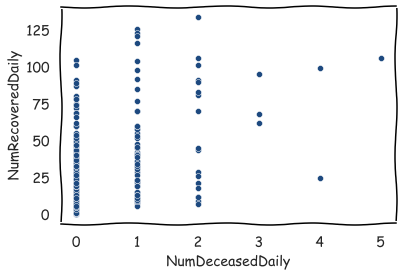

In [90]:
sns.scatterplot(x='NumDeceasedDaily', y='NumRecoveredDaily', data=df_innsbruck_city)

# Lineplot

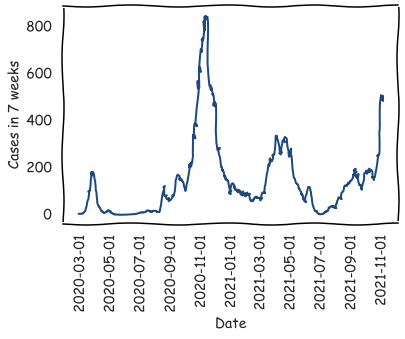

In [91]:
import matplotlib.dates as md

# prepare the figure
fig, ax = plt.subplots()

# plot figure
sns.lineplot(x='Time', y='NumCases7Days', data=df_innsbruck_city)

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases in 7 weeks')

# show the plot
plt.show()

# Barplot

['Total number of recovered', 'Total number of deceased']
[11647, 115]


[None]

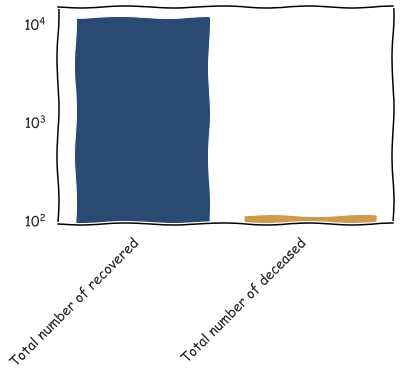

In [92]:
# Lets look at the latest row

last_row = df_innsbruck_city.iloc[-1]
x_labels = ['Total number of recovered', 'Total number of deceased']
y_data = [last_row['NumRecoveredSum'], last_row['NumDeceasedSum']]

print(x_labels)
print(y_data)

ax = sns.barplot(x=x_labels, y=y_data)
ax.set_xticklabels(x_labels, rotation = 45, ha="right")
ax.set(yscale='log')

([<matplotlib.patches.Wedge at 0x7f9a725cdee0>,
 [Text(-1.0994811264378046, 0.03378243044922206, 'Total number of recovered'),
  Text(1.0994811265366464, -0.03378242723232071, 'Total number of deceased')],
 [Text(-0.5997169780569842, 0.01842678024503021, '99.02'),
  Text(0.599716978110898, -0.01842677849035675, '0.98')])

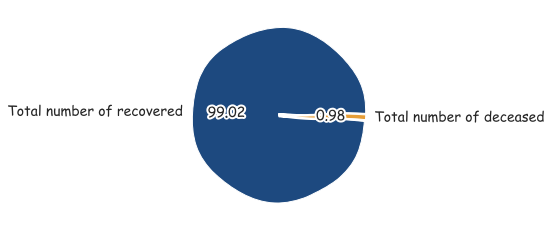

In [93]:
plt.pie(y_data, labels=x_labels, autopct='%.2f')

# Boxplot

<AxesSubplot:xlabel='NumCases'>

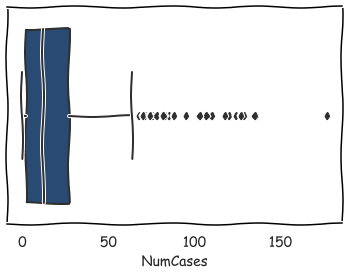

In [94]:
sns.boxplot(x='NumCases', data=df_innsbruck_city)

# Violinplot

<AxesSubplot:xlabel='NumCases'>

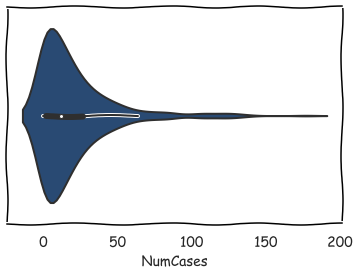

In [95]:
sns.violinplot(x='NumCases', data=df_innsbruck_city)

# Let's add some style :)


**Your task**: Find out the color codes of the MCI logo and insert them in the code below. Then exectute all code cells again.

In [82]:
# Create an array with the colors you want to use
colors = ["#1d497f", "#e69e38", "#3c3c3b"]

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.set_style('whitegrid')

**Your task**: Execute the next code cell and run all code cells again. Do you remember what we said about showing uncertainty? How do the new plots fit into the picture of uncertainty?

In [89]:
plt.xkcd()